# Image Formation Module: Artifacts and Distortion

**Notes from Hany Farid's Computer Vision Course (UC Berkley)**
https://farid.berkeley.edu/downloads/tutorials/learnComputerVision/

In [10]:
## Packages we'll need for our exercises below
import numpy as np
from math import sqrt, sin, cos
import matplotlib.pyplot as plt
from PIL import Image

## Artifacts - [Lens Distortion](https://farid.berkeley.edu/downloads/tutorials/learnComputerVision/lectures/cv-02-13-lensDistortion.mp4)

We learned that lens distortion can be modeled in the following two equations which map the original $x$ and $y$ values to the new, distorted coordinates $\tilde x$ and $\tilde y$.

$\tilde x = x(1 + kr^2)$

$\tilde y = y(1 + kr^2)$

Where $k$ is the estimated amount of lens distortion and $r$ is the distance from the center of the image:

$r = \sqrt{ (x^2 + y^2)}$

### Exercise #4 - Remove Lens Distortion
This exercise is to define a grid which removes the distortion from some image, given the estimated rate of distortion, $k$. 

Hany provides some scaffoilding code to get us started:

```
from warping import *
import matplotlib.pyplot as plt

# load square, grayscale image 
im = Image.open('HanyFaridDistor.jpg')
[ydim,xdim] = im.size
mid = round(max(xdim,ydim)/2)

# define sampling lattices
n = 100 # latice sampling
dst = griddify(shape_to_rect(im.size), n, n) # destination grid
src = dst # source grid

# define new sampling lattice (src)
k = 0.0000005 # estimated lens distortion
dst = dst - mid # put image center at (0,0)

### [ WRITE CODE HERE -- DEFINE SRC ] ###

dst = dst = mid # re-center
dst = dst.astype(int) # convert to integer
src = src + mid # re-center
src = src.astype(int) # convert to integer
```

In [11]:
# I don't think the `warping` library mentioned above is open source... at least I couldn't find it. 
# But I found some similar functions below from old PIL source code referenced here: https://stackoverflow.com/questions/5071063/is-there-a-library-for-image-warping-image-morphing-for-python-with-controlled
def griddify(rect, w_div, h_div):
    w = rect[2] - rect[0]
    h = rect[3] - rect[1]
    x_step = w / float(w_div)
    y_step = h / float(h_div)
    y = rect[1]
    grid_vertex_matrix = []
    for _ in range(h_div + 1):
        grid_vertex_matrix.append([])
        x = rect[0]
        for _ in range(w_div + 1):
            grid_vertex_matrix[-1].append([int(x), int(y)])
            x += x_step
        y += y_step
    grid = np.array(grid_vertex_matrix)
    return grid

def shape_to_rect(shape):
    assert(len(shape) == 2)
    return (0, 0, shape[0], shape[1])

def grid_to_mesh(src_grid, dst_grid):
    assert(src_grid.shape == dst_grid.shape)
    mesh = []
    for i in range(src_grid.shape[0] - 1):
        for j in range(src_grid.shape[1] - 1):
            src_quad = [src_grid[i    , j    , 0], src_grid[i    , j    , 1],
                        src_grid[i + 1, j    , 0], src_grid[i + 1, j    , 1],
                        src_grid[i + 1, j + 1, 0], src_grid[i + 1, j + 1, 1],
                        src_grid[i    , j + 1, 0], src_grid[i    , j + 1, 1]]
            dst_quad = [dst_grid[i    , j    , 0], dst_grid[i    , j    , 1],
                        dst_grid[i + 1, j    , 0], dst_grid[i + 1, j    , 1],
                        dst_grid[i + 1, j + 1, 0], dst_grid[i + 1, j + 1, 1],
                        dst_grid[i    , j + 1, 0], dst_grid[i    , j + 1, 1]]
            dst_rect = quad_to_rect(dst_quad)
            mesh.append([dst_rect, src_quad])
    return mesh

def quad_to_rect(quad):
    assert(len(quad) == 8)
    assert(quad_as_rect(quad))
    return (quad[0], quad[1], quad[4], quad[3])

def quad_as_rect(quad):
    if quad[0] != quad[2]: return False
    if quad[1] != quad[7]: return False
    if quad[4] != quad[6]: return False
    if quad[3] != quad[5]: return False
    return True

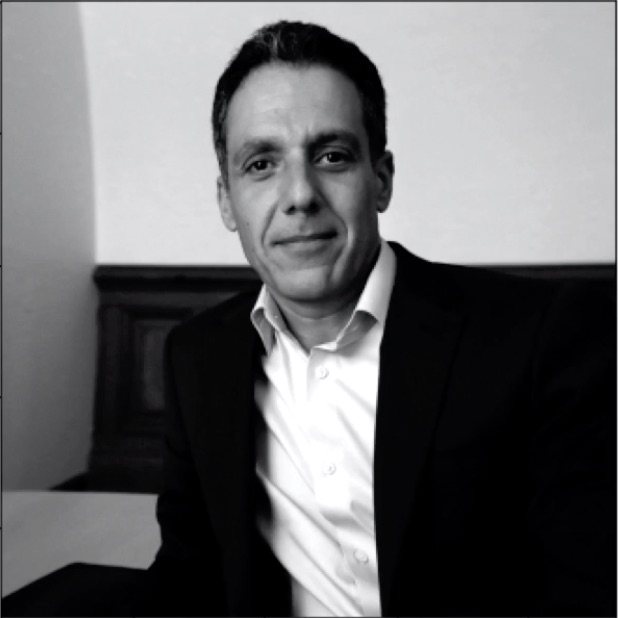

In [12]:
# load square, grayscale image that I shamelessly took for this exercise from Hany's slides here: https://farid.berkeley.edu/learnComputerVision/lectures/cv-02-13-lensDistortion.mp4
im = Image.open('../images/HanyFaridDistort.jpg')
[ydim,xdim] = im.size
mid = round(max(xdim,ydim)/2)

# You can see that the vertical line in the background is bowed out - indicating a pin cushion distortion.. k > 0
display(im)

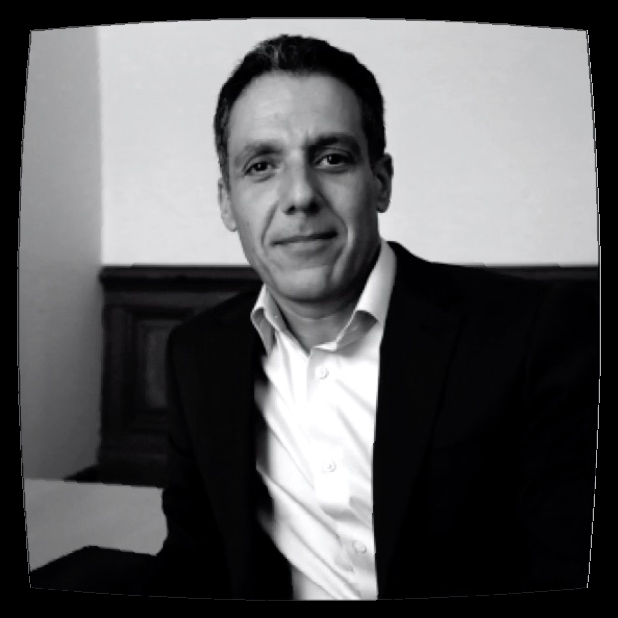

In [13]:
# define sampling lattices
n = 100 # latice sampling
dst = griddify(shape_to_rect(im.size), n, n) # destination grid
src = dst # source grid

# define new sampling lattice (src)
k = 0.0000007 # I changed this from .0000005 to .0000007 after rendering
dst = dst - mid # put image center at (0,0)
for row, i in enumerate(dst):
    for col, j in enumerate(i):
        r = sqrt(j[0]**2 + j[1]**2)
        x = j[0] * (1 + k*r**2)
        y = j[1] * (1 + k*r**2)
        src[row][col] = [x,y]

dst = dst + mid # re-center
dst = dst.astype(int) # convert to integer
src = src + mid # re-center
src = src.astype(int) # convert to integer

mesh = grid_to_mesh(src, dst)
imt = im.transform(im.size, Image.MESH, mesh)
display(imt)